In [1]:
import sys

print(sys.version_info)

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [2]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "rnn"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")

In [6]:
tf.keras.utils.get_file("ridership.tgz", "https://github.com/ageron/data/raw/main/ridership.tgz", cache_dir=".", extract=True)

108512/108512 [==============================] - 0s 0us/step


'./datasets/ridership.tgz'

In [7]:
import pandas as pd
from pathlib import Path

path = Path("datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])

In [8]:
df.dtypes

service_date      datetime64[ns]
day_type                  object
bus                        int64
rail_boardings             int64
total_rides                int64
dtype: object

In [9]:
df.columns = ['day', 'day_type', 'bus', 'rail', 'total']
df.dtypes

day         datetime64[ns]
day_type            object
bus                  int64
rail                 int64
total                int64
dtype: object

In [15]:
df = df.drop('total', axis=1)
df = df.drop_duplicates()
df = df.sort_values('day').set_index('day')

KeyError: ignored

In [11]:
df.dtypes

day_type    object
bus          int64
rail         int64
total        int64
dtype: object

In [12]:
df['day_type'].value_counts()

W    5336
U    1216
A    1087
Name: day_type, dtype: int64

In [13]:
df.head()

,day_type,bus,rail,total
day,,,,
2001-01-01,U,297192,126455,423647
2001-01-02,W,780827,501952,1282779
2001-01-03,W,824923,536432,1361355
2001-01-04,W,870021,550011,1420032
2001-01-05,W,890426,557917,1448343


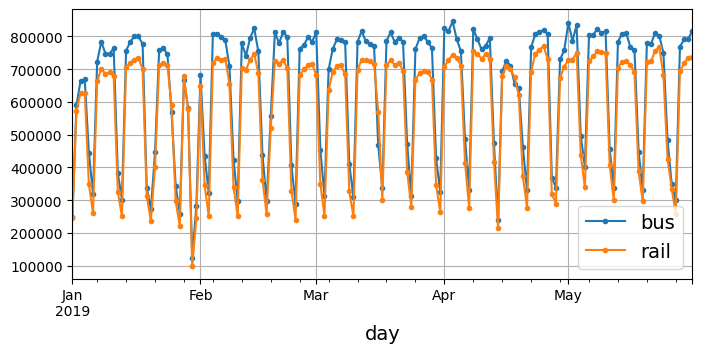

In [16]:
df['2019-01':'2019-05'].plot(grid=True, marker='.', figsize=(8, 3.5))
plt.show()

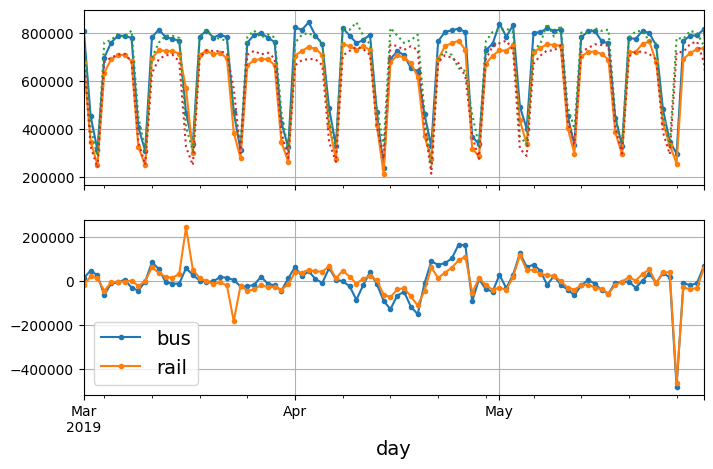

In [27]:
diff_7 = df[["bus", "rail"]].diff(7)["2019-03":"2019-05"]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
df.plot(ax=axs[0], legend=False, marker=".")  # original time series
df.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
diff_7.plot(ax=axs[1], grid=True, marker=".")  # 7-day difference time series
axs[0].set_ylim([170_000, 900_000])  # extra code – beautifies the plot
#save_fig("differencing_plot")  # extra code – saves the figure for the book
plt.show()